In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#reading the data
df = pd.read_csv("data.txt",delimiter="|" )
df1 = pd.read_csv("data.txt",delimiter="|" )

# Task 1: Replication of Results

In [5]:
#getting the differences
df = df.set_index('date').diff()

In [6]:
#putting zero for missing values
df = df.fillna(0)

In [7]:
df = df.reset_index(drop=True)

In [8]:
df.head()

,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.0000,0.0000
1,48.3,17.0,22.3,5.4,-8.0,0.8,1.55,0.05,-0.8,0.799,0.0000,0.0000
2,64.2,55.1,19.3,-6.8,18.4,1.8,1.20,0.06,-1.0,0.804,5.4519,-5.3886
3,30.9,-33.4,32.1,22.9,13.5,1.7,0.98,0.12,-0.4,0.807,-0.7756,0.8989
4,19.6,25.2,-28.9,39.4,-2.1,2.4,1.15,0.05,-0.7,0.522,3.4326,-3.3859


In [9]:
X = df.drop(["consumption"],1)
y = df["consumption"]

In [10]:
#diving the data into train and test
X_train,X_test,y_train, y_test = tts(X,y, test_size = 0.3, random_state = 0)

In [11]:
#running the liner regression with all features
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
r2_score(y_test,y_pred)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {r2_score(y_test,y_pred)}')

Coefficients: [  0.82584426  -0.78495041  -0.65247479   0.08703996  -0.79998438
   0.06914629 -28.56474021  -3.10066509   7.86067901  29.09078127
  28.24161495]
Intercept: -1.0504445660300732
R^2 score: 0.6435780980471286


In [12]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

C:\Users\am250126\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     53.63
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           1.47e-52
Time:                        15:07:41   Log-Likelihood:                -800.93
No. Observations:                 204   AIC:                             1626.
Df Residuals:                     192   BIC:                             1666.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9942      2.979     -1.005      0.316      -8.870       2.882
gdp            0.7712      0.046     16.733      0.000       0.680       0.862
invest        -0.7422      0.058    -12.907      0.000      -0.856      -0.629
government    -0.5870      0.084     -7.012      0.000      -0.752      -0.422
dpi            0.1056      0.035      2.992      0.003       0.036       0.175
cpi           -0.3923      0.464     -0.845      0.399      -1.308       0.523
m1             0.1473      0.110      1.338      0.183      -0.070       0.364
tbill        -64.4621    177.656     -0.363      0.717    -414.871     285.947
unemp         -3.6360      3.013     -1.207      0.229      -9.579       2.307
population     9.9463      3.900      2.551      0.012       2.255      17.638
inflation     63.4802    177.605      0.357      0.721    -286.828     413.788
interest      62.7642    177.616      0.353      0.724    -287.565     413.093
==============================================================================
Omnibus:                        6.580   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                8.640
Skew:                           0.206   Prob(JB):                       0.0133
Kurtosis:                       3.920   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
import statsmodels.formula.api as sm

model = sm.ols(formula= 'y~X', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     53.63
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           1.47e-52
Time:                        15:07:41   Log-Likelihood:                -800.93
No. Observations:                 204   AIC:                             1626.
Df Residuals:                     192   BIC:                             1666.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9942      2.979     -1.005      0.316      -8.870       2.882
X[0]           0.7712      0.046     16.733      0.000       0.680       0.862
X[1]          -0.7422      0.058    -12.907      0.000      -0.856      -0.629
X[2]          -0.5870      0.084     -7.012      0.000      -0.752      -0.422
X[3]           0.1056      0.035      2.992      0.003       0.036       0.175
X[4]          -0.3923      0.464     -0.845      0.399      -1.308       0.523
X[5]           0.1473      0.110      1.338      0.183      -0.070       0.364
X[6]         -64.4621    177.656     -0.363      0.717    -414.871     285.947
X[7]          -3.6360      3.013     -1.207      0.229      -9.579       2.307
X[8]           9.9463      3.900      2.551      0.012       2.255      17.638
X[9]          63.4802    177.605      0.357      0.721    -286.828     413.788
X[10]         62.7642    177.616      0.353      0.724    -287.565     413.093
==============================================================================
Omnibus:                        6.580   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                8.640
Skew:                           0.206   Prob(JB):                       0.0133
Kurtosis:                       3.920   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#running the given model
import statsmodels.formula.api as sm

model = sm.ols(formula= 'y~dpi+unemp', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     50.90
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           1.31e-18
Time:                        15:07:41   Log-Likelihood:                -902.36
No. Observations:                 204   AIC:                             1811.
Df Residuals:                     201   BIC:                             1821.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1423      1.901      8.493      0.000      12.394      19.890
dpi            0.3580      0.048      7.515      0.000       0.264       0.452
unemp        -15.9655      3.788     -4.215      0.000     -23.435      -8.496
==============================================================================
Omnibus:                       12.421   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.746
Skew:                           0.470   Prob(JB):                     0.000628
Kurtosis:                       3.923   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can detect multicollinearity using the variance inflation factor (VIF). Without going into too many details, the interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,gdp,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
vif,4.85232,3.482289,1.338257,1.553556,1.228471,1.195472,21745.867088,1.789568,1.103482,314780.794947,290730.785479


In [16]:
# considered only those features whose VIF is close to 1

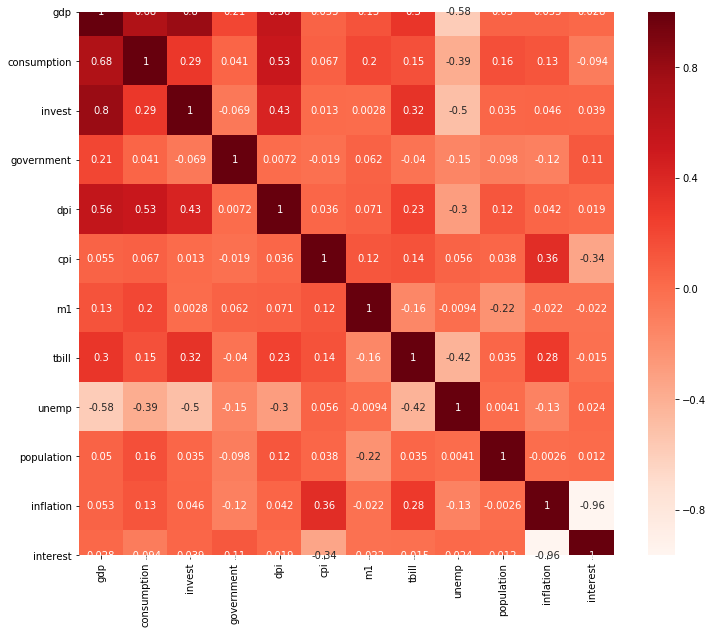

In [17]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
import statsmodels.formula.api as sm

model = sm.ols(formula= 'y~government+dpi+cpi+m1+unemp+population', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     20.75
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           8.58e-19
Time:                        15:07:42   Log-Likelihood:                -894.19
No. Observations:                 204   AIC:                             1802.
Df Residuals:                     197   BIC:                             1826.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0039      4.596      0.654      0.514      -6.059      12.067
government     0.0041      0.115      0.035      0.972      -0.222       0.231
dpi            0.3282      0.047      6.991      0.000       0.236       0.421
cpi            0.4361      0.661      0.660      0.510      -0.867       1.739
m1             0.5550      0.163      3.395      0.001       0.233       0.877
unemp        -16.7008      3.731     -4.476      0.000     -24.059      -9.342
population    15.8912      6.039      2.632      0.009       3.983      27.800
==============================================================================
Omnibus:                        8.785   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               11.145
Skew:                           0.315   Prob(JB):                      0.00380
Kurtosis:                       3.956   Cond. No.                         220.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared:	0.387 after removing the co-related features.

On the given model, dpi and unemp are the only features. we can see government,cpi,m1,unemp,population are not co-related therefore i added them as a input which leads us the better prediction

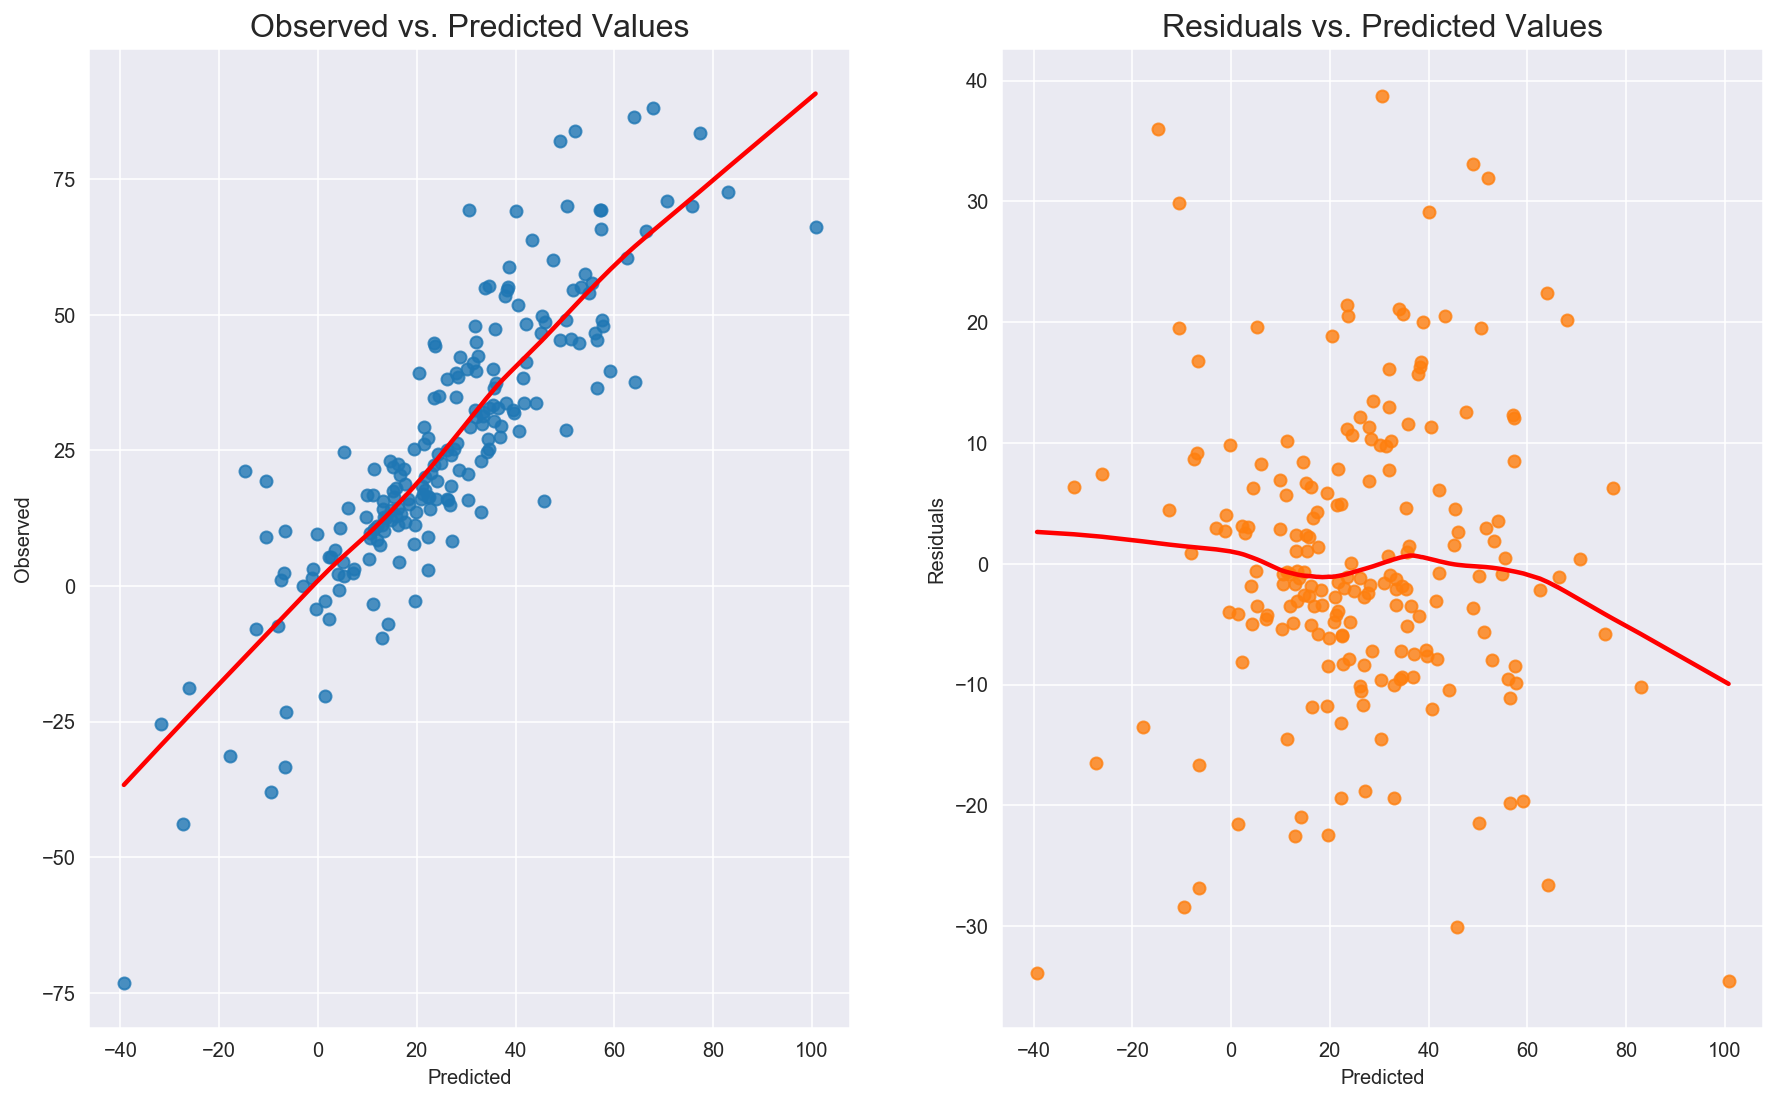

In [19]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)    

In [20]:
lin_reg.resid.mean()

-1.8111873656630004e-15

# Task 2: Outlier Detections

In [42]:
from numpy import mean
from numpy import std
data = df1.drop(["date"],1)
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
data.dtypes

gdp            float64
consumption    float64
invest         float64
government     float64
dpi            float64
cpi            float64
m1             float64
tbill          float64
unemp          float64
population     float64
inflation      float64
interest       float64
dtype: object

In [43]:
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off


In [46]:
lower

gdp           -1763.678440
consumption   -1368.937968
invest         -519.957230
government       59.076281
dpi           -1389.647736
cpi            -220.048079
m1             -622.609226
tbill            -3.285115
unemp             0.960353
population      107.076273
inflation        -6.232644
interest         -7.337104
dtype: float64

In [45]:
# identify outliers
outliers = [x for x in data if x < lower ]
print('Identified outliers: %d' % len(outliers))

TypeError: Invalid comparison between dtype=float64 and str

In [37]:
from numpy import percentile
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower ]
print('Identified outliers: %d' % len(outliers))

Percentiles: 25th=-0.063, 75th=12.100, IQR=12.162


TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [39]:
data

,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.0000,0.0000
1,48.3,17.0,22.3,5.4,-8.0,0.8,1.55,0.05,-0.8,0.799,0.0000,0.0000
2,64.2,55.1,19.3,-6.8,18.4,1.8,1.20,0.06,-1.0,0.804,5.4519,-5.3886
3,30.9,-33.4,32.1,22.9,13.5,1.7,0.98,0.12,-0.4,0.807,-0.7756,0.8989
4,19.6,25.2,-28.9,39.4,-2.1,2.4,1.15,0.05,-0.7,0.522,3.4326,-3.3859
...,...,...,...,...,...,...,...,...,...,...,...,...
199,178.4,83.6,69.6,31.6,46.8,1.2,31.40,0.36,-0.1,0.613,-3.0435,3.4069
200,52.6,88.1,-2.5,-4.4,52.4,8.7,-11.10,0.48,-0.1,2.157,5.8912,-5.4079
201,126.9,54.6,78.7,16.8,92.1,3.7,-8.40,0.24,0.0,2.174,-3.9687,4.2021
202,30.7,65.8,-12.8,-7.2,42.8,3.8,-9.30,0.25,0.1,2.191,0.0563,0.1970
